# Regression Challenge
### Author: Sabine Hollatz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import preprocessing, metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import seaborn as sns

/home/saholly/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Loading and Preprocessing

In [2]:
df_train = pd.read_csv('train_data.csv')
df_train = df_train.drop('Unnamed: 0', axis=1)
df_train.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  4058200630  20141002T000000         3       1.75         2190      7021   
1  3613600150  20150105T000000         3       2.50         2370      6840   
2  7170200080  20140617T000000         2       1.00         1230      3800   
3  9542300530  20141124T000000         4       2.25         2510      9963   
4  3626039028  20140818T000000         3       1.00         1160      7491   

   floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0     1.0           0     2          4  ...        1390            800   
1     2.0           0     0          3  ...        2370              0   
2     1.0           0     0          3  ...        1230              0   
3     1.0           0     0          4  ...        2200            310   
4     1.0           0     0          4  ...        1160              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1953             0    98178  47.5033 -122.232           2180   
1      1987             0    98119  47.6503 -122.366           1590   
2      1928             0    98115  47.6797 -122.292           1610   
3      1967             0    98005  47.5973 -122.177           3110   
4      1917             0    98177  47.7024 -122.359           1800   

   sqft_lot15   price  
0        7155  353000  
1        4400  300523  
2        3800  435000  
3        9963  800000  
4        2267  417500  

[5 rows x 21 columns]

In [3]:
df_val = pd.read_csv('val_data.csv')
df_val.head()

Unique_idx          id             date  bedrooms  bathrooms  sqft_living  \
0       15544  1310430130  20141009T000000         4       2.75         2790   
1       17454  2540830020  20150401T000000         3       2.25         1630   
2       21548  8835770330  20140819T000000         2       1.50         2370   
3        3427  7732400490  20141105T000000         4       2.50         2270   
4        8809     2800031  20150401T000000         3       1.00         1430   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      6600     2.0           0     0  ...      9        2790              0   
1      6449     1.0           0     0  ...      7        1310            320   
2    184231     2.0           0     0  ...     11        2370              0   
3      7665     2.0           0     0  ...      9        2270              0   
4      7599     1.5           0     0  ...      6        1010            420   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      2000             0    98058  47.4362 -122.109           2900   
1      1986             0    98011  47.7275 -122.232           1620   
2      2005             0    98045  47.4543 -121.778           3860   
3      1986             0    98052  47.6612 -122.148           2450   
4      1930             0    98168  47.4783 -122.265           1290   

   sqft_lot15  
0        6752  
1        7429  
2      151081  
3        8706  
4       10320  

[5 rows x 21 columns]

In [4]:
df_train.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [5]:
df_train.isnull().count()

id               17290
date             17290
bedrooms         17290
bathrooms        17290
sqft_living      17290
sqft_lot         17290
floors           17290
waterfront       17290
view             17290
condition        17290
grade            17290
sqft_above       17290
sqft_basement    17290
yr_built         17290
yr_renovated     17290
zipcode          17290
lat              17290
long             17290
sqft_living15    17290
sqft_lot15       17290
price            17290
dtype: int64

In [6]:
df_train.isna().count()

id               17290
date             17290
bedrooms         17290
bathrooms        17290
sqft_living      17290
sqft_lot         17290
floors           17290
waterfront       17290
view             17290
condition        17290
grade            17290
sqft_above       17290
sqft_basement    17290
yr_built         17290
yr_renovated     17290
zipcode          17290
lat              17290
long             17290
sqft_living15    17290
sqft_lot15       17290
price            17290
dtype: int64

There are no missing values in the dataset.

#### Attribute Distributions

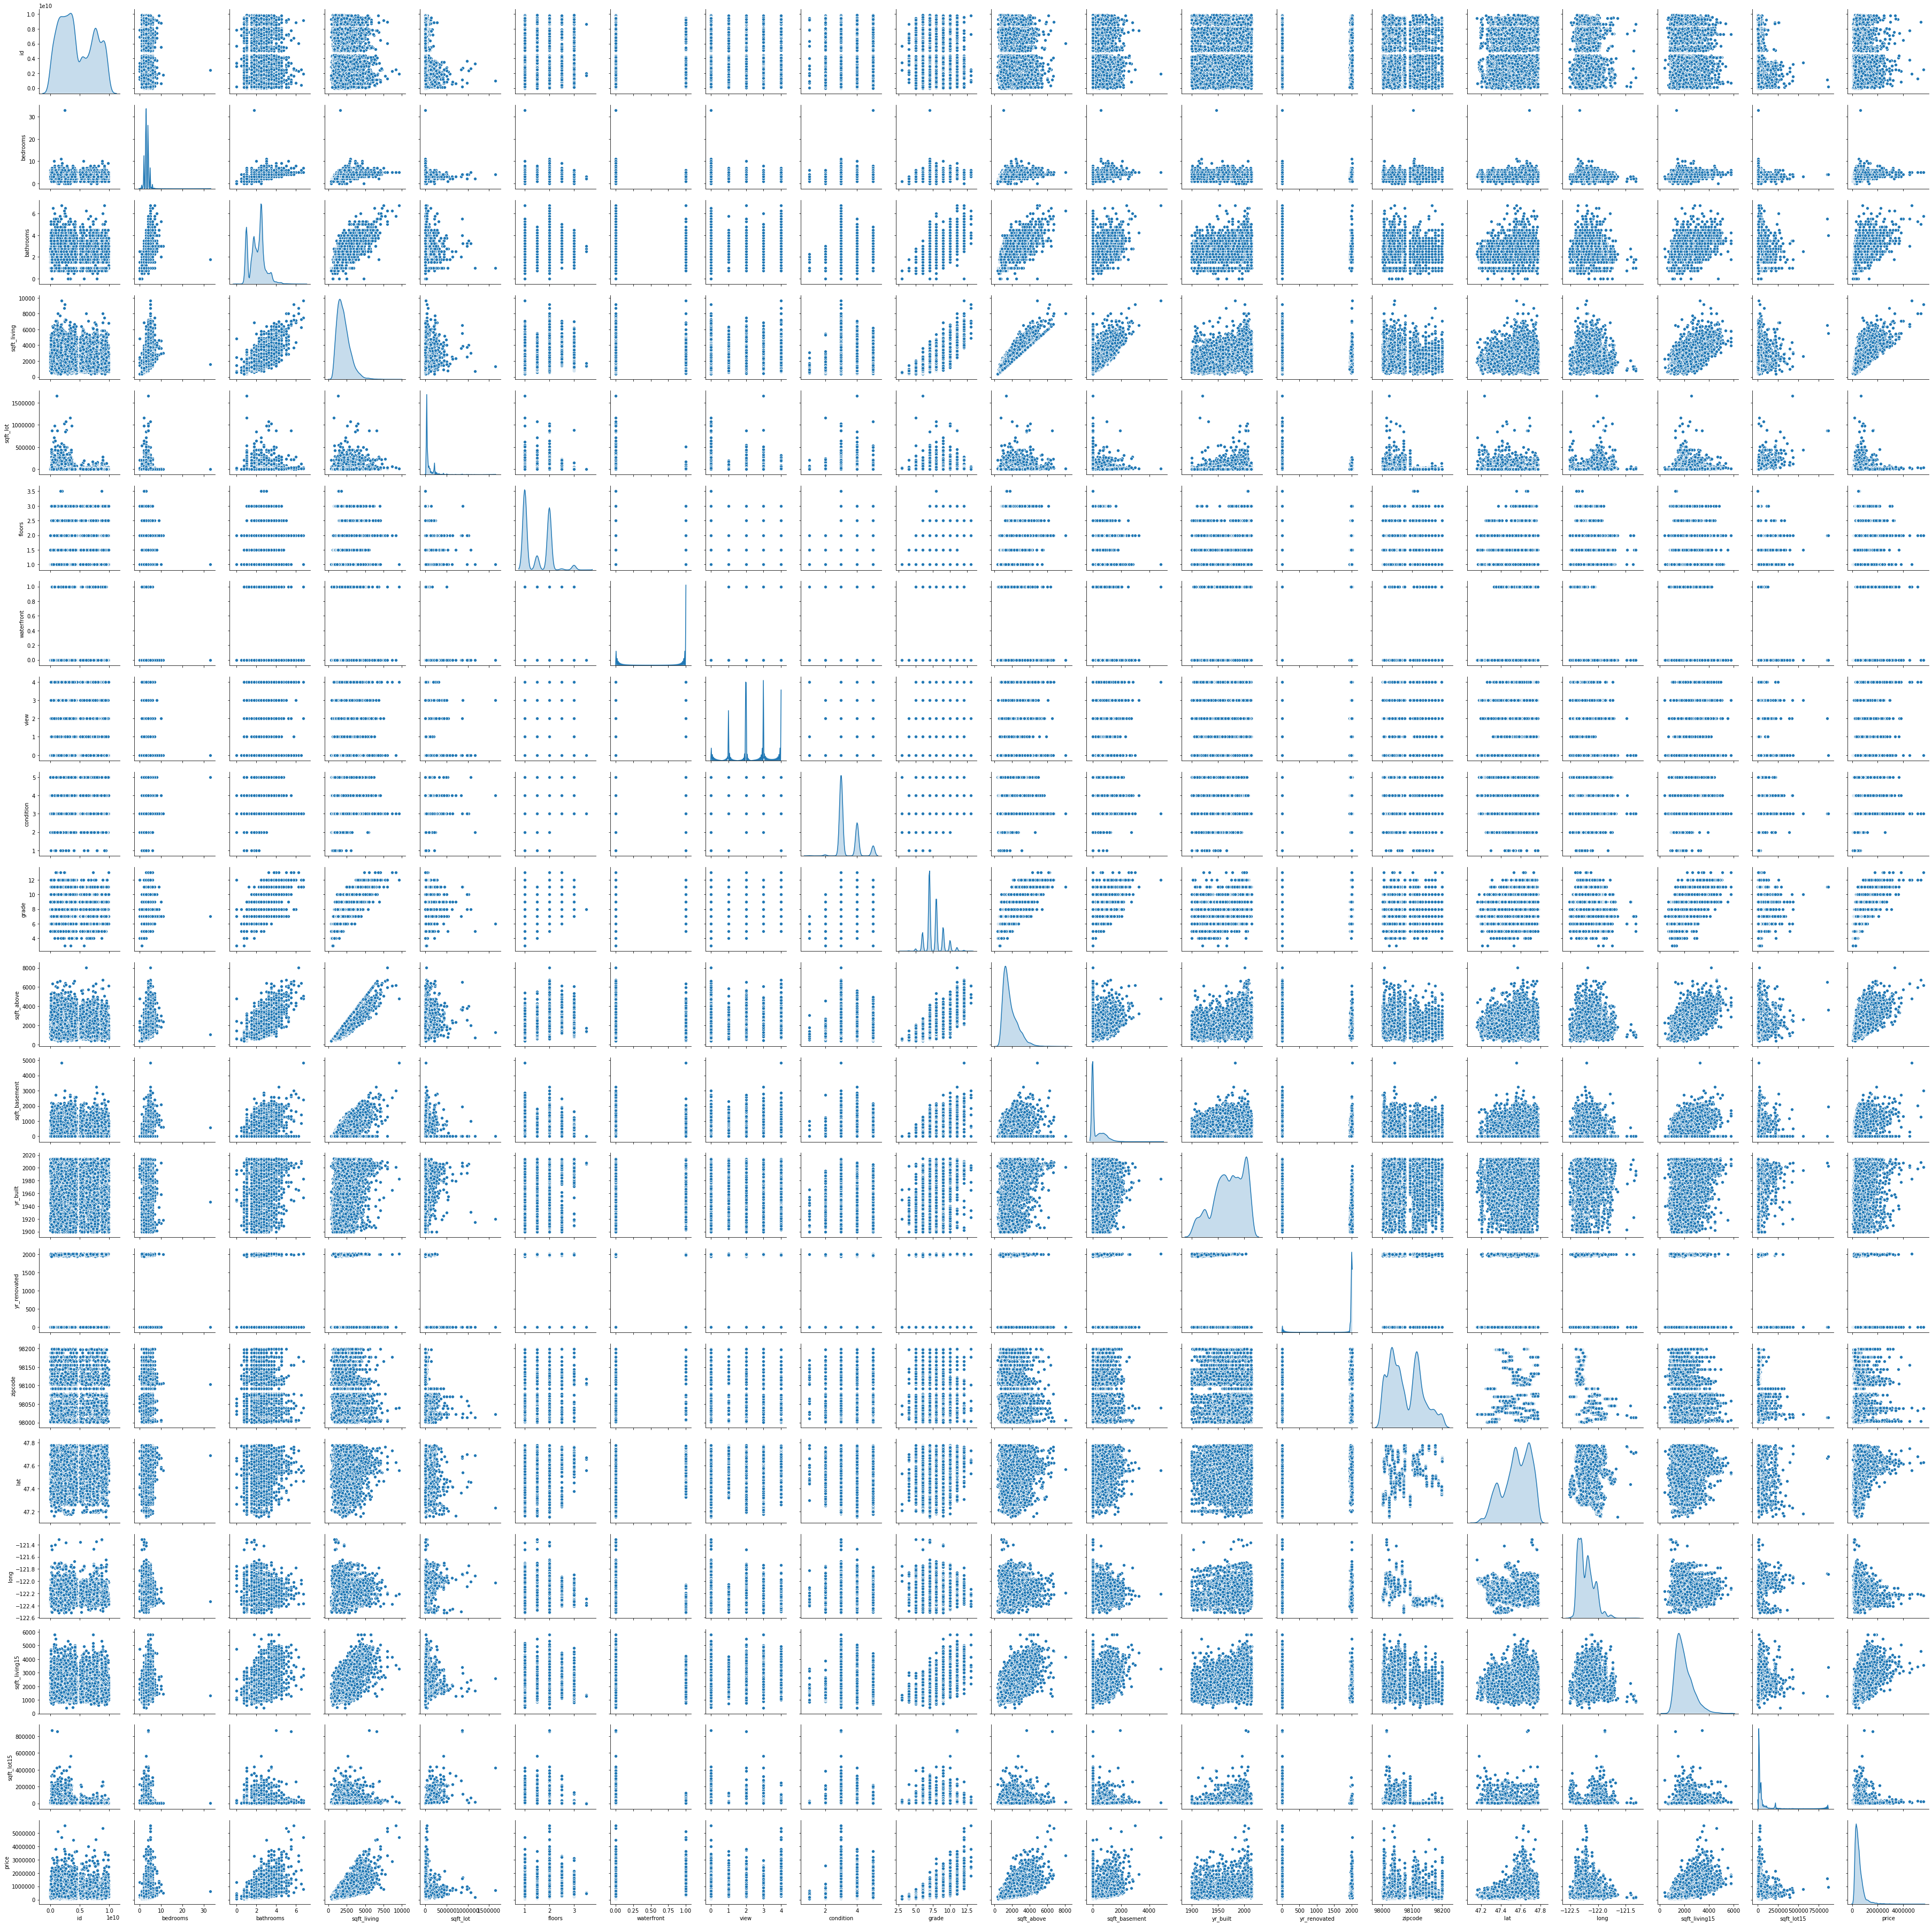

In [7]:
sns.pairplot(df_train, diag_kind='kde')

In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_train.describe()

id  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count      17290.000 17290.000  17290.000    17290.000   17290.000 17290.000   
mean  4577035478.512     3.366      2.112     2074.586   15210.985     1.494   
std   2877096526.638     0.934      0.765      903.772   42829.885     0.540   
min      1000102.000     0.000      0.000      370.000     520.000     1.000   
25%   2122784848.000     3.000      1.500     1420.000    5040.000     1.000   
50%   3904921185.000     3.000      2.250     1920.000    7605.000     1.500   
75%   7308600032.500     4.000      2.500     2550.000   10630.750     2.000   
max   9900000190.000    33.000      6.750     9640.000 1651359.000     3.500   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
count   17290.000 17290.000  17290.000 17290.000   17290.000      17290.000   
mean        0.008     0.234      3.411     7.656    1782.822        291.764   
std         0.088     0.764      0.651     1.173     816.765        441.082   
min         0.000     0.000      1.000     3.000     370.000          0.000   
25%         0.000     0.000      3.000     7.000    1190.000          0.000   
50%         0.000     0.000      3.000     7.000    1560.000          0.000   
75%         0.000     0.000      4.000     8.000    2210.000        560.000   
max         1.000     4.000      5.000    13.000    8020.000       4820.000   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count 17290.000     17290.000 17290.000 17290.000 17290.000      17290.000   
mean   1970.915        84.597 98078.058    47.560  -122.214       1984.131   
std      29.419       402.087    53.560     0.139     0.141        681.614   
min    1900.000         0.000 98001.000    47.156  -122.519        399.000   
25%    1951.000         0.000 98033.000    47.470  -122.329       1490.000   
50%    1975.000         0.000 98065.000    47.571  -122.231       1840.000   
75%    1997.000         0.000 98118.000    47.678  -122.125       2360.000   
max    2015.000      2015.000 98199.000    47.778  -121.315       5790.000   

       sqft_lot15       price  
count   17290.000   17290.000  
mean    12790.232  537880.616  
std     27728.922  353979.837  
min       659.000   75000.000  
25%      5100.000  322000.000  
50%      7615.000  450000.000  
75%     10067.500  645000.000  
max    871200.000 5570000.000

In [9]:
train_X = df_train.drop('price',axis=1)
train_X.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  4058200630  20141002T000000         3      1.750         2190      7021   
1  3613600150  20150105T000000         3      2.500         2370      6840   
2  7170200080  20140617T000000         2      1.000         1230      3800   
3  9542300530  20141124T000000         4      2.250         2510      9963   
4  3626039028  20140818T000000         3      1.000         1160      7491   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0   1.000           0     2          4      7        1390            800   
1   2.000           0     0          3      9        2370              0   
2   1.000           0     0          3      7        1230              0   
3   1.000           0     0          4      9        2200            310   
4   1.000           0     0          4      6        1160              0   

   yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0      1953             0    98178 47.503 -122.232           2180        7155  
1      1987             0    98119 47.650 -122.366           1590        4400  
2      1928             0    98115 47.680 -122.292           1610        3800  
3      1967             0    98005 47.597 -122.177           3110        9963  
4      1917             0    98177 47.702 -122.359           1800        2267

In [10]:
train_y = df_train['price']
train_y.head()

0    353000
1    300523
2    435000
3    800000
4    417500
Name: price, dtype: int64

#### Outliers Detection

In [11]:
def outlierCheck(df, attr):
    outlier_indices = []
    outlier_values = []
    inlier_indices = []
    q1 = df[attr].quantile(.25)
    q3 = df[attr].quantile(.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    for index, row in df.iterrows():
        if row[attr] > upper_bound:
            outlier_indices.append(index)
            outlier_values.append(row[attr])
        elif row[attr] < lower_bound:
            outlier_indices.append(index)
            outlier_values.append(row[attr])
        else:
            inlier_indices.append(index)
    return inlier_indices, outlier_indices, outlier_values

In [12]:
features = train_X.drop(['id', 'date'], axis=1)
outliers = []
for feature in features:
    inlier, outlier, _ = outlierCheck(df_train, feature)
    print("In train_X feature {} are {} outliers".format(feature, len(outlier)))
print("")

In train_X feature bedrooms are 441 outliers
In train_X feature bathrooms are 202 outliers
In train_X feature sqft_living are 435 outliers
In train_X feature sqft_lot are 1934 outliers
In train_X feature floors are 0 outliers
In train_X feature waterfront are 134 outliers
In train_X feature view are 1703 outliers
In train_X feature condition are 22 outliers
In train_X feature grade are 1534 outliers
In train_X feature sqft_above are 471 outliers
In train_X feature sqft_basement are 388 outliers
In train_X feature yr_built are 0 outliers
In train_X feature yr_renovated are 733 outliers
In train_X feature zipcode are 0 outliers
In train_X feature lat are 1 outliers
In train_X feature long are 205 outliers
In train_X feature sqft_living15 are 425 outliers
In train_X feature sqft_lot15 are 1735 outliers



There are a number of outliers according to the IQR in every feature except the number of floors, the year_built and zipcode. The most outliers are found in the features sqft_lot, view, grade and sqft_lot15. At this point we will just stay aware of those, but will not take any actions. 

#### Normalization

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
df_train_scaled = df_train.copy(deep=True)

for attr in df_train_scaled.columns:
    if attr == 'id' or attr == 'date' or attr == 'price':
        continue
    df_train_scaled[attr] = min_max_scaler.fit_transform(df_train_scaled[attr].values.reshape(-1,1))
df_train_scaled.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  4058200630  20141002T000000     0.091      0.259        0.196     0.004   
1  3613600150  20150105T000000     0.091      0.370        0.216     0.004   
2  7170200080  20140617T000000     0.061      0.148        0.093     0.002   
3  9542300530  20141124T000000     0.121      0.333        0.231     0.006   
4  3626039028  20140818T000000     0.091      0.148        0.085     0.004   

   floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0   0.000       0.000 0.500      0.750  ...       0.133          0.166   
1   0.400       0.000 0.000      0.500  ...       0.261          0.000   
2   0.000       0.000 0.000      0.500  ...       0.112          0.000   
3   0.000       0.000 0.000      0.750  ...       0.239          0.064   
4   0.000       0.000 0.000      0.750  ...       0.103          0.000   

   yr_built  yr_renovated  zipcode   lat  long  sqft_living15  sqft_lot15  \
0     0.461         0.000    0.894 0.559 0.238          0.330       0.007   
1     0.757         0.000    0.596 0.795 0.127          0.221       0.004   
2     0.243         0.000    0.576 0.843 0.189          0.225       0.004   
3     0.583         0.000    0.020 0.710 0.284          0.503       0.011   
4     0.148         0.000    0.889 0.879 0.133          0.260       0.002   

    price  
0  353000  
1  300523  
2  435000  
3  800000  
4  417500  

[5 rows x 21 columns]

### Regression Models

Different regression approaches are used such as multilinear regression, KNN, and decision tree. 

#### Multilinear Regression

Forward selection is used in an attempt to reduce dimensions and increase interpretability.

In [14]:
model_all = smf.ols(formula='price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15', data=df_train_scaled).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2413.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:49:38   Log-Likelihood:            -2.3493e+05
No. Observations:               17290   AIC:                         4.699e+05
Df Residuals:                   17272   BIC:                         4.700e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.485e+05   1.38e+04    -18.032      0.000   -2.75e+05   -2.21e+05
bedrooms      -1.057e+06   6.63e+04    -15.932      0.000   -1.19e+06   -9.27e+05
bathrooms      2.433e+05   2.36e+04     10.299      0.000    1.97e+05     2.9e+05
sqft_living    7.514e+05   1.65e+04     45.455      0.000    7.19e+05    7.84e+05
sqft_lot       2.184e+05    8.1e+04      2.696      0.007    5.96e+04    3.77e+05
floors         2.534e+04   9664.599      2.622      0.009    6393.595    4.43e+04
waterfront     5.389e+05   1.84e+04     29.315      0.000    5.03e+05    5.75e+05
view            2.08e+05   9182.937     22.649      0.000     1.9e+05    2.26e+05
condition      1.107e+05   1.01e+04     10.995      0.000    9.09e+04     1.3e+05
grade          9.557e+05   2.31e+04     41.455      0.000     9.1e+05       1e+06
sqft_above      7.19e+05   1.84e+04     39.151      0.000    6.83e+05    7.55e+05
sqft_basement   3.04e+05   1.78e+04     17.064      0.000    2.69e+05    3.39e+05
yr_built      -2.895e+05   8950.585    -32.350      0.000   -3.07e+05   -2.72e+05
yr_renovated   4.247e+04   7890.956      5.382      0.000     2.7e+04    5.79e+04
zipcode       -1.088e+05   6995.361    -15.559      0.000   -1.23e+05   -9.51e+04
lat            3.794e+05   7133.416     53.185      0.000    3.65e+05    3.93e+05
long          -2.484e+05    1.7e+04    -14.643      0.000   -2.82e+05   -2.15e+05
sqft_living15  1.143e+05      2e+04      5.704      0.000     7.5e+04    1.54e+05
sqft_lot15    -3.027e+05   6.66e+04     -4.545      0.000   -4.33e+05   -1.72e+05
==============================================================================
Omnibus:                    12053.178   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           528803.182
Skew:                           2.828   Prob(JB):                         0.00
Kurtosis:                      29.496   Cond. No.                     1.70e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
model_1 = smf.ols(formula='price~sqft_living', data=df_train_scaled).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.653e+04
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:49:38   Log-Likelihood:            -2.3965e+05
No. Observations:               17290   AIC:                         4.793e+05
Df Residuals:                   17288   BIC:                         4.793e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.113e+04   4109.314     17.309      0.000    6.31e+04    7.92e+04
sqft_living  2.538e+06   1.97e+04    128.561      0.000     2.5e+06    2.58e+06
==============================================================================
Omnibus:                     9996.688   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           192685.250
Skew:                           2.395   Prob(JB):                         0.00
Kurtosis:                      18.637   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model_2 = smf.ols(formula='price~sqft_living+lat', data=df_train_scaled).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                 1.136e+04
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:49:38   Log-Likelihood:            -2.3819e+05
No. Observations:               17290   AIC:                         4.764e+05
Df Residuals:                   17287   BIC:                         4.764e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.093e+05   6252.208    -33.477      0.000   -2.22e+05   -1.97e+05
sqft_living  2.485e+06   1.82e+04    136.720      0.000    2.45e+06    2.52e+06
lat          4.469e+05   7938.849     56.292      0.000    4.31e+05    4.62e+05
==============================================================================
Omnibus:                    11806.023   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           337887.057
Skew:                           2.892   Prob(JB):                         0.00
Kurtosis:                      23.870   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model_3 = smf.ols(formula='price~sqft_living+lat+view', data=df_train_scaled).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     9080.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:49:38   Log-Likelihood:            -2.3727e+05
No. Observations:               17290   AIC:                         4.745e+05
Df Residuals:                   17286   BIC:                         4.746e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.957e+05   5934.718    -32.984      0.000   -2.07e+05   -1.84e+05
sqft_living  2.266e+06   1.79e+04    126.427      0.000    2.23e+06     2.3e+06
lat          4.515e+05   7526.355     59.992      0.000    4.37e+05    4.66e+05
view         4.037e+05   9139.172     44.176      0.000    3.86e+05    4.22e+05
==============================================================================
Omnibus:                    11266.125   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           329127.504
Skew:                           2.688   Prob(JB):                         0.00
Kurtosis:                      23.687   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model_4 = smf.ols(formula='price~sqft_living+lat+view+grade', data=df_train_scaled).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     7691.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:49:38   Log-Likelihood:            -2.3661e+05
No. Observations:               17290   AIC:                         4.732e+05
Df Residuals:                   17285   BIC:                         4.733e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.127e+05   8189.322    -50.400      0.000   -4.29e+05   -3.97e+05
sqft_living  1.552e+06   2.59e+04     59.929      0.000     1.5e+06     1.6e+06
lat          4.204e+05   7294.060     57.635      0.000    4.06e+05    4.35e+05
view         3.845e+05   8813.341     43.625      0.000    3.67e+05    4.02e+05
grade         7.94e+05   2.15e+04     36.984      0.000    7.52e+05    8.36e+05
==============================================================================
Omnibus:                    12468.685   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           469036.250
Skew:                           3.038   Prob(JB):                         0.00
Kurtosis:                      27.782   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model_5 = smf.ols(formula='price~sqft_living+lat+view+grade+yr_built', data=df_train_scaled).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     7070.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:49:38   Log-Likelihood:            -2.3582e+05
No. Observations:               17290   AIC:                         4.717e+05
Df Residuals:                   17284   BIC:                         4.717e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.407e+05   8022.980    -42.465      0.000   -3.56e+05   -3.25e+05
sqft_living  1.535e+06   2.47e+04     62.009      0.000    1.49e+06    1.58e+06
lat          3.534e+05   7161.768     49.341      0.000    3.39e+05    3.67e+05
view         3.164e+05   8585.719     36.855      0.000       3e+05    3.33e+05
grade        1.128e+06   2.21e+04     51.053      0.000    1.09e+06    1.17e+06
yr_built     -2.87e+05   7065.597    -40.626      0.000   -3.01e+05   -2.73e+05
==============================================================================
Omnibus:                    12822.752   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           574981.214
Skew:                           3.109   Prob(JB):                         0.00
Kurtosis:                      30.558   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model_6 = smf.ols(formula='price~sqft_living+lat+view+grade+yr_built+waterfront', data=df_train_scaled).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     6358.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:49:38   Log-Likelihood:            -2.3537e+05
No. Observations:               17290   AIC:                         4.708e+05
Df Residuals:                   17283   BIC:                         4.708e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.454e+05   7819.334    -44.176      0.000   -3.61e+05    -3.3e+05
sqft_living  1.536e+06   2.41e+04     63.678      0.000    1.49e+06    1.58e+06
lat          3.567e+05   6979.479     51.113      0.000    3.43e+05     3.7e+05
view         2.089e+05   9085.473     22.998      0.000    1.91e+05    2.27e+05
grade        1.137e+06   2.15e+04     52.807      0.000     1.1e+06    1.18e+06
yr_built     -2.87e+05   6884.881    -41.681      0.000      -3e+05   -2.73e+05
waterfront   5.692e+05   1.88e+04     30.336      0.000    5.32e+05    6.06e+05
==============================================================================
Omnibus:                    12108.795   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           505525.341
Skew:                           2.866   Prob(JB):                         0.00
Kurtosis:                      28.862   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model_7 = smf.ols(formula='price~sqft_living+lat+view+grade+yr_built+waterfront+bedrooms', data=df_train_scaled).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     5520.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:49:38   Log-Likelihood:            -2.3530e+05
No. Observations:               17290   AIC:                         4.706e+05
Df Residuals:                   17282   BIC:                         4.707e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.743e+05   9670.098    -28.364      0.000   -2.93e+05   -2.55e+05
sqft_living  1.713e+06   2.79e+04     61.304      0.000    1.66e+06    1.77e+06
lat          3.542e+05   6951.767     50.956      0.000    3.41e+05    3.68e+05
view         2.012e+05   9067.070     22.191      0.000    1.83e+05    2.19e+05
grade        1.099e+06   2.17e+04     50.750      0.000    1.06e+06    1.14e+06
yr_built    -2.878e+05   6854.957    -41.983      0.000   -3.01e+05   -2.74e+05
waterfront   5.578e+05   1.87e+04     29.822      0.000    5.21e+05    5.94e+05
bedrooms    -8.171e+05   6.59e+04    -12.403      0.000   -9.46e+05   -6.88e+05
==============================================================================
Omnibus:                    11881.598   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           472357.408
Skew:                           2.800   Prob(JB):                         0.00
Kurtosis:                      27.986   Cond. No.                         65.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted r-squared value does not change much anymore. The most influencial features appear to be sqft_living, lat, view, grade, yr_built, and waterfront.

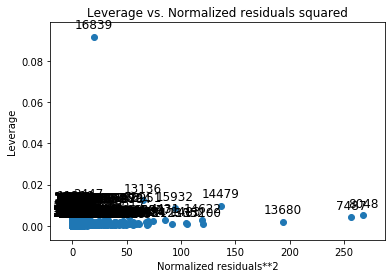

In [22]:
sm.graphics.plot_leverage_resid2(model_7, alpha=0.05);

Display the *4* rows for the points indicated having high leverage and/or high residual squared. You will use this to improve the model $R^2$.

In [23]:
df_train_scaled.loc[[7487,8048, 13680, 16839]]

id             date  bedrooms  bathrooms  sqft_living  \
7487   8907500070  20150413T000000     0.152      0.741        0.823   
8048   2470100110  20140804T000000     0.152      0.852        0.953   
13680  3835500195  20140618T000000     0.121      0.444        0.654   
16839  2402100895  20140625T000000     1.000      0.259        0.135   

       sqft_lot  floors  waterfront  view  condition  ...  sqft_above  \
7487      0.014   0.400       0.000 1.000      0.500  ...       0.830   
8048      0.021   0.400       0.000 0.000      0.500  ...       0.762   
13680     0.016   0.400       0.000 0.000      0.500  ...       0.792   
16839     0.003   0.000       0.000 0.000      1.000  ...       0.088   

       sqft_basement  yr_built  yr_renovated  zipcode   lat  long  \
7487           0.266     0.948         0.000    0.015 0.752 0.248   
8048           0.622     0.878         0.000    0.192 0.761 0.238   
13680          0.000     0.878         0.000    0.015 0.748 0.249   
16839          0.120     0.409         0.000    0.515 0.856 0.156   

       sqft_living15  sqft_lot15    price  
7487           0.779       0.024  5350000  
8048           0.586       0.027  5570000  
13680          0.616       0.016  4489000  
16839          0.173       0.005   640000  

[4 rows x 21 columns]

In [24]:
df_train_scaled_cleaned = df_train_scaled.drop([7487,8048, 13680, 16839])
train_y_cleaned = train_y.drop([7487,8048, 13680, 16839])

In [25]:
model_6_cleaned = smf.ols(formula='price~sqft_living+lat+view+grade+yr_built+waterfront', data=df_train_scaled_cleaned).fit()
model_6_cleaned.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     6488.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:49:43   Log-Likelihood:            -2.3494e+05
No. Observations:               17286   AIC:                         4.699e+05
Df Residuals:                   17279   BIC:                         4.699e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.424e+05   7650.420    -44.761      0.000   -3.57e+05   -3.27e+05
sqft_living   1.49e+06   2.37e+04     62.974      0.000    1.44e+06    1.54e+06
lat          3.564e+05   6828.094     52.191      0.000    3.43e+05     3.7e+05
view         2.091e+05   8894.737     23.510      0.000    1.92e+05    2.27e+05
grade        1.146e+06   2.11e+04     54.397      0.000    1.11e+06    1.19e+06
yr_built    -2.855e+05   6735.999    -42.379      0.000   -2.99e+05   -2.72e+05
waterfront   5.737e+05   1.84e+04     31.246      0.000    5.38e+05     6.1e+05
==============================================================================
Omnibus:                    10242.274   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           232735.591
Skew:                           2.421   Prob(JB):                         0.00
Kurtosis:                      20.312   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model_7_cleaned = smf.ols(formula='price~sqft_living+lat+view+grade+yr_built+waterfront+bedrooms', data=df_train_scaled_cleaned).fit()
model_7_cleaned.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     5631.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:49:43   Log-Likelihood:            -2.3486e+05
No. Observations:               17286   AIC:                         4.697e+05
Df Residuals:                   17278   BIC:                         4.698e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -2.7e+05   9626.537    -28.048      0.000   -2.89e+05   -2.51e+05
sqft_living  1.671e+06   2.78e+04     60.125      0.000    1.62e+06    1.73e+06
lat          3.536e+05   6802.172     51.989      0.000     3.4e+05    3.67e+05
view         2.012e+05   8879.294     22.665      0.000    1.84e+05    2.19e+05
grade        1.108e+06   2.12e+04     52.196      0.000    1.07e+06    1.15e+06
yr_built    -2.862e+05   6707.164    -42.677      0.000   -2.99e+05   -2.73e+05
waterfront   5.619e+05   1.83e+04     30.698      0.000    5.26e+05    5.98e+05
bedrooms    -8.332e+05   6.77e+04    -12.306      0.000   -9.66e+05      -7e+05
==============================================================================
Omnibus:                    10076.997   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           223477.789
Skew:                           2.373   Prob(JB):                         0.00
Kurtosis:                      19.963   Cond. No.                         69.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# remove outliers
df_train_scaled_removedOutliers = df_train_scaled_cleaned.drop(outliers)
train_y_removedOutliers = train_y_cleaned.drop(outliers)

In [28]:
model_6_removedOutliers = smf.ols(formula='price~sqft_living+lat+view+grade+yr_built+waterfront', data=df_train_scaled_removedOutliers).fit()
model_6_removedOutliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     6488.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:49:44   Log-Likelihood:            -2.3494e+05
No. Observations:               17286   AIC:                         4.699e+05
Df Residuals:                   17279   BIC:                         4.699e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.424e+05   7650.420    -44.761      0.000   -3.57e+05   -3.27e+05
sqft_living   1.49e+06   2.37e+04     62.974      0.000    1.44e+06    1.54e+06
lat          3.564e+05   6828.094     52.191      0.000    3.43e+05     3.7e+05
view         2.091e+05   8894.737     23.510      0.000    1.92e+05    2.27e+05
grade        1.146e+06   2.11e+04     54.397      0.000    1.11e+06    1.19e+06
yr_built    -2.855e+05   6735.999    -42.379      0.000   -2.99e+05   -2.72e+05
waterfront   5.737e+05   1.84e+04     31.246      0.000    5.38e+05     6.1e+05
==============================================================================
Omnibus:                    10242.274   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           232735.591
Skew:                           2.421   Prob(JB):                         0.00
Kurtosis:                      20.312   Cond. No.                         28.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
df_val.head()

Unique_idx          id             date  bedrooms  bathrooms  sqft_living  \
0       15544  1310430130  20141009T000000         4      2.750         2790   
1       17454  2540830020  20150401T000000         3      2.250         1630   
2       21548  8835770330  20140819T000000         2      1.500         2370   
3        3427  7732400490  20141105T000000         4      2.500         2270   
4        8809     2800031  20150401T000000         3      1.000         1430   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      6600   2.000           0     0  ...      9        2790              0   
1      6449   1.000           0     0  ...      7        1310            320   
2    184231   2.000           0     0  ...     11        2370              0   
3      7665   2.000           0     0  ...      9        2270              0   
4      7599   1.500           0     0  ...      6        1010            420   

   yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0      2000             0    98058 47.436 -122.109           2900        6752  
1      1986             0    98011 47.727 -122.232           1620        7429  
2      2005             0    98045 47.454 -121.778           3860      151081  
3      1986             0    98052 47.661 -122.148           2450        8706  
4      1930             0    98168 47.478 -122.265           1290       10320  

[5 rows x 21 columns]

Removing the outliers by IQR, did not improve the r^2 value.

In [30]:
predictions_linearModel = model_6_cleaned.predict(df_val)
df_predictions_linearModel = pd.DataFrame(dict(Unique_idx = df_val['Unique_idx'], price = predictions_linearModel))
df_predictions_linearModel = df_predictions_linearModel.astype({'Unique_idx':'int32'})
df_predictions_linearModel.head()

Unique_idx          price
0       15544 3611785848.921
1       17454 1885721381.964
2       21548 2987048975.855
3        3427 2841299210.435
4        8809 1602563087.979

In [31]:
df_predictions_linearModel.to_csv('Linear_Regression_predictions_Doozers.csv', index=False)

#### Decision Tree

In [32]:
import os
graphviz_path = '/home/saholly/anaconda3/envs/ml4622/lib/graphviz'
os.environ["PATH"] += os.pathsep + graphviz_path

In [33]:
selected_features = df_train[['sqft_living', 'lat', 'view', 'grade', 'yr_built', 'waterfront']]

In [34]:
clf = DecisionTreeClassifier(max_depth=5, max_features = 6)
clf = clf.fit(selected_features,train_y)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

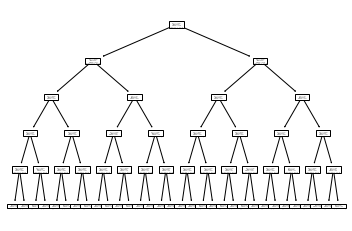

In [35]:
from sklearn import tree
tree.plot_tree(clf);

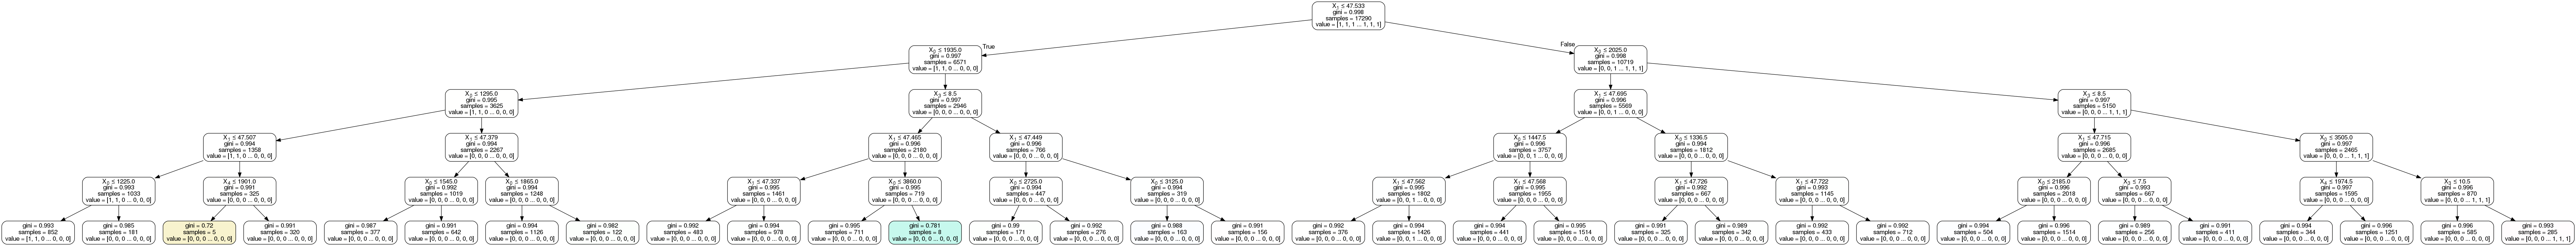

In [36]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [37]:
predictions_dt = clf.predict(df_val[['sqft_living', 'lat', 'view', 'grade', 'yr_built', 'waterfront']])
df_predictions_dt = pd.DataFrame(dict(Unique_idx = df_val['Unique_idx'], price = predictions_dt))
df_predictions_dt.head()

Unique_idx   price
0       15544  440000
1       17454  415000
2       21548  535000
3        3427  775000
4        8809  265000

In [38]:
df_predictions_dt.to_csv('Decision_Tree_Predictions_Doozers.csv', index=False)